In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp '/content/drive/MyDrive/kaggleee.json' ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download deepcontractor/smoke-detection-dataset -f smoke_detection_iot.csv

smoke_detection_iot.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
df = pd.read_csv('./smoke_detection_iot.csv.zip', encoding='ISO-8859-1')
df

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


### Memeriksa Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   eCO2[ppm]       62630 non-null  int64  
 4   Raw H2          62630 non-null  int64  
 5   Raw Ethanol     62630 non-null  int64  
 6   Pressure[hPa]   62630 non-null  float64
 7   PM1.0           62630 non-null  float64
 8   PM2.5           62630 non-null  float64
 9   NC0.5           62630 non-null  float64
 10  NC1.0           62630 non-null  float64
 11  NC2.5           62630 non-null  float64
 12  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 6.2 MB


In [ ]:
df.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

In [ ]:
df.nunique()

Temperature[C]    21672
Humidity[%]        3890
TVOC[ppb]          1966
eCO2[ppm]          1713
Raw H2             1830
Raw Ethanol        2659
Pressure[hPa]      2213
PM1.0              1337
PM2.5              1351
NC0.5              3093
NC1.0              4113
NC2.5              1161
Fire Alarm            2
dtype: int64

In [ ]:
df['Fire Alarm'].unique()

array([0, 1])

1    44757
0    17871
Name: Fire Alarm, dtype: int64


<Axes: xlabel='Fire Alarm', ylabel='count'>

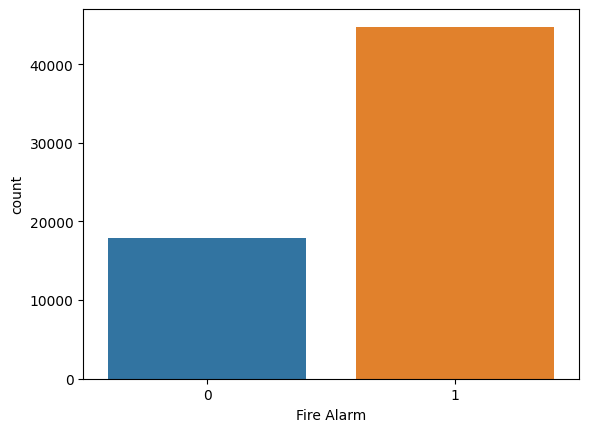

In [ ]:
print(df['Fire Alarm'].value_counts())
sns.countplot(x='Fire Alarm', data=df)

In [ ]:
X = pd.get_dummies(df.iloc[:,:-1])
y = df['Fire Alarm']

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X

array([[5.12692214e-01, 7.23239218e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.12875275e-01, 7.12534905e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.13046131e-01, 7.01520323e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.98865023e-01, 7.91188334e-02, 1.04500000e-02, ...,
        6.42464148e-05, 1.18848850e-05, 4.66255771e-07],
       [5.01501098e-01, 8.22215327e-02, 1.06333333e-02, ...,
        6.37584673e-05, 1.17693107e-05, 4.66255771e-07],
       [5.04137174e-01, 8.96680112e-02, 1.07166667e-02, ...,
        6.34331690e-05, 1.16922612e-05, 4.66255771e-07]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((50102, 12), (12526, 12))

## Model KNN

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred= model.predict(X_test)
y_test,y_pred

(23961    1
 55484    0
 5394     1
 49563    1
 55682    0
         ..
 59763    0
 9273     1
 14013    1
 33052    1
 17582    1
 Name: Fire Alarm, Length: 12526, dtype: int64,
 array([1, 0, 1, ..., 1, 1, 1]))

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: ", accuracy)

Akurasi:  0.9991218266006706


In [ ]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[3593,    7],
       [   4, 8922]])

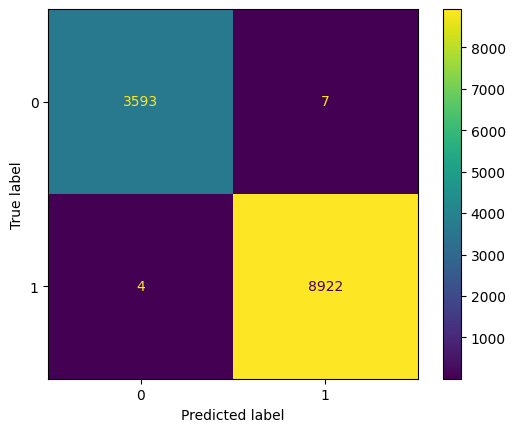

In [ ]:
from sklearn import metrics

cm= confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3600
           1       1.00      1.00      1.00      8926

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

